# Лабораторная работа 1. Погрешности
## Методика построения графиков
Найдем аналитические формулы для производных функций данных в задании. Выберем некую точку и посчитаем в ней значение производной $\widetilde{f}$. Затем в это же точке вычислим значение производной численным методом с шагом h - $f(h)$. Погрешностью метода будет разность $\Delta(h) = |\widetilde{f} - f(h)|$. Для $\Delta(h)$ построим график в log масштабе.

## Аналитические формулы производных
|Функция | Производная | Производная в точке $\widetilde{f}$ |
|:------:|:-----------:|:-------------------:|
| $\sin(x^2)$ | $2x\cos(x^2)$ | $f'(0) = 0$ |
| $\cos(\sin(x))$ | $-\sin(\sin x)\cos x$ | $f'(0) = 0$ |
| $e^{(\sin(\cos(x)))}$ | $e^{(\sin(\cos(x)))}\cos(\cos x)(-\sin x)$ | $f'(0) = 0$ |
| $\ln(x+3)$ | $\dfrac{1}{x+3}$ | $f'(-1) = 0.5$ |
| $(x + 3)^{1/2}$ | $\dfrac{1}{2}(x + 3)^{-1/2}$ | $f'(1) = 0,25$ |

In [60]:
import numpy as np

class Function:
    # Hardcoding derivative value instead of using analytic formulas
    # in order to eliminate machine error.
    # Even though using functions would be more scalable solution.
    def __init__(self, tex_formula, compute_func, deriv_point, deriv_val):
        self.formula = tex_formula
        self.point = deriv_point
        self.derivative = deriv_val
        self.func = compute_func
    def f(self, h):
        return self.func(self.point + h)

functions = [
    Function('$\sin(x^2)$', lambda x: np.sin(x**2), np.pi/2, np.pi*np.cos((np.pi/2)**2)),
    Function('$\cos(\sin(x))$', lambda x: np.cos(np.sin(x)), 0, 0),
    Function('$e^{(\sin(\cos(x)))}$', lambda x: np.exp(np.sin(np.cos(x))), 0, 0),
    Function('$\ln(x+3)$', lambda x: np.log(x + 3), 5, 0.125),
    Function('$(x + 3)^{1/2}$', lambda x: (x + 3)**0.5, 1, 0.25)
]

# latex helper
def gen_tex(coeff):
    if (coeff == 1):
        return r"\dfrac{f(x+h)-f(x-h)}{2h}"
    return "\dfrac{f(x + %d h) - f(x - %d h)}{ %d h }" % (coeff, coeff, 2 * coeff)

methods = {
    r'$\dfrac{f(x+h)-f(x)}{h}$'    : lambda f, h: (f(h) - f(0)) / h,
    r'$\dfrac{f(x)-f(x-h)}{h}$'    : lambda f, h: (f(0) - f(-h)) / h,
    '$' + gen_tex(1) + '$'         : lambda f, h: (f(h) - f(-h)) / (2*h),
    r'$\dfrac{4}{3}' + gen_tex(1) + r'-\dfrac{1}{3}' + gen_tex(2) + '$' :
        lambda f, h: 4/3 * (f(h) - f(-h)) / (2*h) - 1/3 * (f(2*h) - f(-2*h)) / (4*h),
    r'$\dfrac{3}{2}' + gen_tex(1) + r'-\dfrac{3}{5}' + gen_tex(2) + r'+\dfrac{1}{10}' + gen_tex(3) + '$':
        lambda f, h: 3/2 * (f(h) - f(-h)) / (2*h) - 3/5 * (f(2*h) - f(-2*h)) / (4*h) + 1/10 * (f(3*h) - f(-3*h)) / (6*h)
}

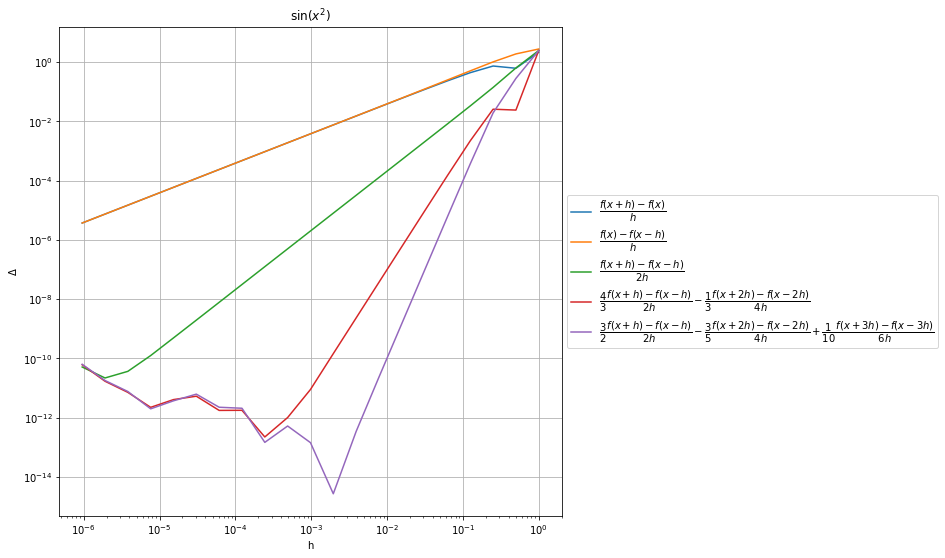

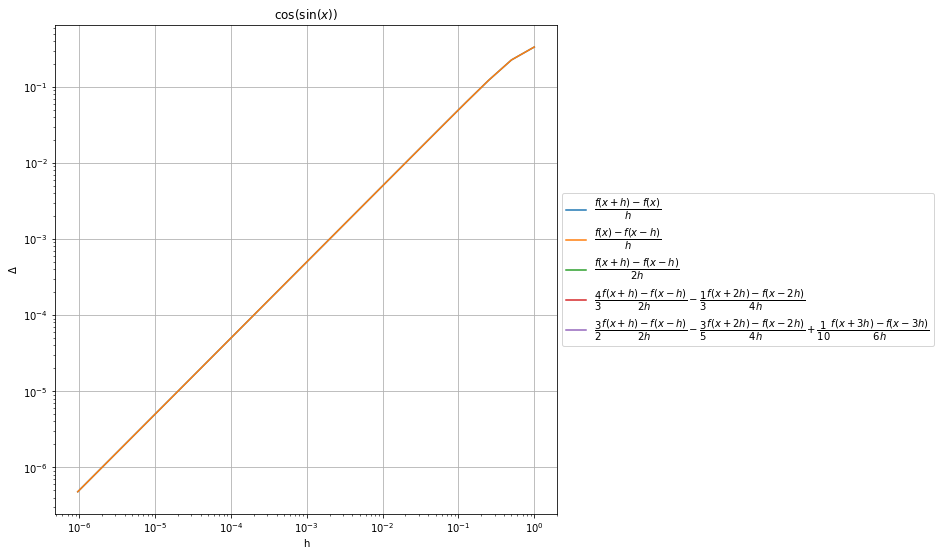

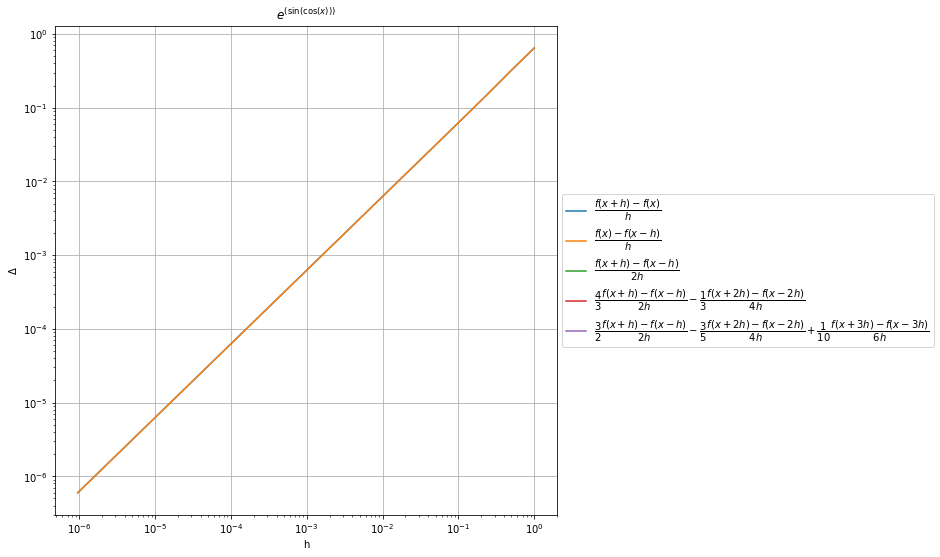

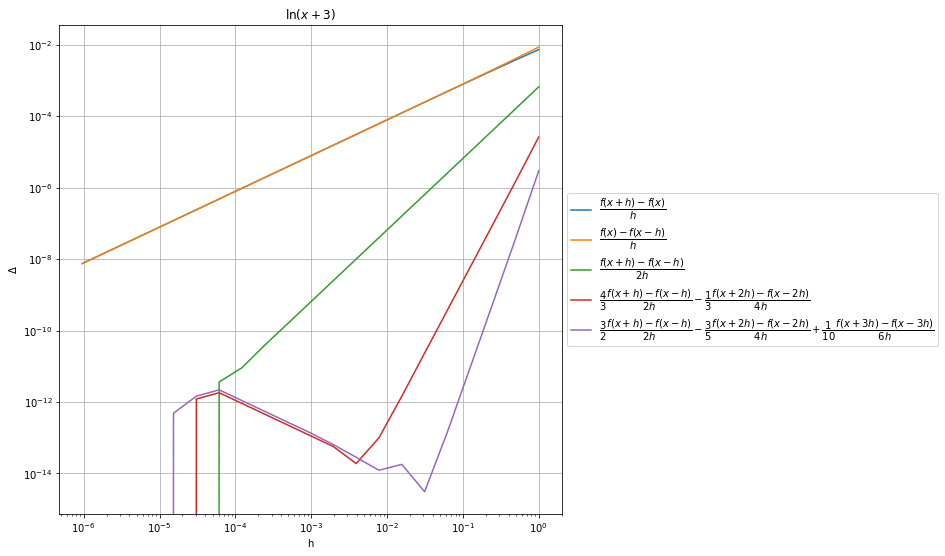

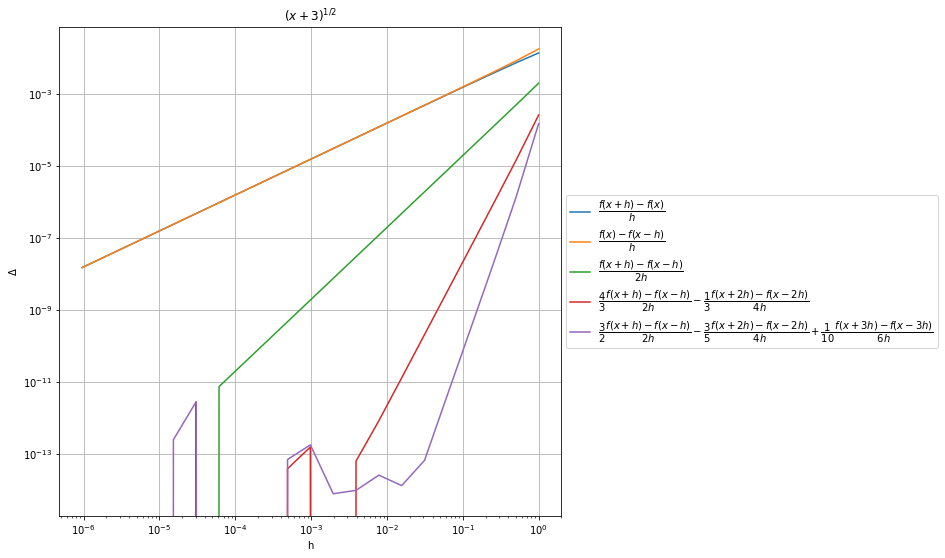

In [77]:
import matplotlib.pyplot as plt


def generate_plot(func_tex, method_tex, step, delta, plot):
    plot.loglog(step, delta, label=method_tex, base=10)
    plot.grid()
    plot.set_xlabel('h')
    plot.set_ylabel('$\Delta$')
    plot.set_title(func_tex)
    plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))

for f in functions:
    plt.figure(figsize=(9, 9))
    plot = plt.subplot()
    for met in methods.items():
        step = 2 / 2**np.arange(1, 22)
        delta = np.abs(f.derivative - met[1](f.f, step))
        generate_plot(f.formula, met[0], step, delta, plot)
    plt.show()